In [11]:
import zipfile 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vuBiWuBSOTPPjRkKWZCSS51m5adBtETW' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vuBiWuBSOTPPjRkKWZCSS51m5adBtETW" -O data.zip && rm -rf /tmp/cookies.txt

with zipfile.ZipFile('./data.zip', 'r') as zip_ref:
        print('The extraction of the images can take some time...')
        zip_ref.extractall('./')
        print('Extraction done')

--2019-12-07 12:09:20--  https://docs.google.com/uc?export=download&confirm=iAYJ&id=1vuBiWuBSOTPPjRkKWZCSS51m5adBtETW
Resolving docs.google.com (docs.google.com)... 74.125.195.113, 74.125.195.100, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tvuqo5kurou4eclggtp22hl3pkf34iic/1575720000000/17506844314399870089/*/1vuBiWuBSOTPPjRkKWZCSS51m5adBtETW?e=download [following]
--2019-12-07 12:09:20--  https://doc-04-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tvuqo5kurou4eclggtp22hl3pkf34iic/1575720000000/17506844314399870089/*/1vuBiWuBSOTPPjRkKWZCSS51m5adBtETW?e=download
Resolving doc-04-24-docs.googleusercontent.com (doc-04-24-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-04-24-docs.googleusercontent.com

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import plot_model



model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
# COMPILE
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
plot_model(model, to_file='own_dcnn.png', show_shapes=True, show_layer_names=True)

In [20]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        './data/train/',  # this is the target directory
        target_size=(300, 300),  # all images will be resized to 300x300
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        './data/validation/',
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='categorical')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
from keras.callbacks import EarlyStopping, ModelCheckpoint 
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=100)
mc = ModelCheckpoint('model2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


history = model.fit_generator(
        train_generator,
        steps_per_epoch=4000 // batch_size,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=1000 // batch_size,
        callbacks=[es, mc])

Epoch 1/60
250/250 [==============================] - 111s 444ms/step - loss: 0.7168 - accuracy: 0.5422 - val_loss: 0.6626 - val_accuracy: 0.5161

Epoch 00001: val_accuracy improved from -inf to 0.51613, saving model to model2.h5
Epoch 2/60
250/250 [==============================] - 108s 434ms/step - loss: 0.6533 - accuracy: 0.6208 - val_loss: 0.5900 - val_accuracy: 0.6707

Epoch 00002: val_accuracy improved from 0.51613 to 0.67073, saving model to model2.h5
Epoch 3/60
250/250 [==============================] - 109s 436ms/step - loss: 0.5350 - accuracy: 0.7420 - val_loss: 0.5785 - val_accuracy: 0.7825

Epoch 00003: val_accuracy improved from 0.67073 to 0.78252, saving model to model2.h5
Epoch 4/60
250/250 [==============================] - 110s 439ms/step - loss: 0.4711 - accuracy: 0.7847 - val_loss: 0.3785 - val_accuracy: 0.7876

Epoch 00004: val_accuracy improved from 0.78252 to 0.78760, saving model to model2.h5
Epoch 5/60
250/250 [==============================] - 109s 436ms/step -

In [22]:
history = Out[21]

In [29]:
import matplotlib.pyplot as plt

def plot_losses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper left')
    plt.show()
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train accuracy', 'Validation accuracy'], loc='lower right')
    plt.show()

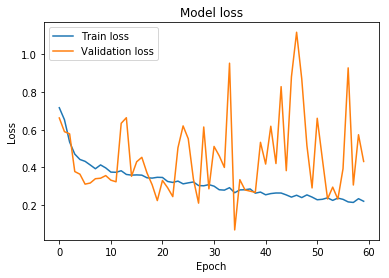

In [24]:
plot_losses(history)

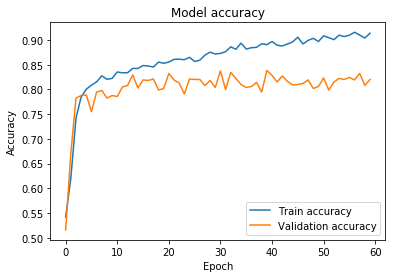

In [30]:
plot_acc(history)